![DSB logo](img/Dolan.jpg)
# Data Types

## PD4E Chapter 7: Data Types
### How do you read/manipulate/store data in Python?

# What You Learned in Python/Pandas that could Apply Here

You will need following knowledge from the first half of this course:
1. functions and methods (definitions and calls)
2. subsetting/slicing data
3. loops
4. list comprehension

# What You will Learn in this Chapter
You will learn following techniques in this chapter:
1. finding data types of columns in a DF
2. converting between data types
3. working with __categorical data__

# Data Types

- When we talk about data types, we essentially talk about _attribute types_
    - _attributes_ are columns or features in a dataset
    - different categorizations of attribute types are used in analyitics
        - quantitative vs. qualitative
        - continuous vs. discrete
        - numerical vs. categorical
    - but they essentially refer to the same split
        - some data has numerical value with numeical semantics, e.g., age, income
        - some data may not have numerical values, or even they do have numerical values, there is not numerical semantics, e.g., _age group_, _income group_

In [7]:
# we will use the built-in dataset from 'seaborn' as an example
import pandas as pd
import seaborn as sns

tips_data = sns.load_dataset('tips')
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
# look at data types
tips_data.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

# Why to differentiate?

- Firstly, we use _categorical_ data as categories
    - this is particularly useful when we try to compare two or more categories in the data
    - but note that whatever we try to compare __must be__ continuous data

In [9]:
# we try to compare average 'tip' - continuous data
# across different 'sex' groups - categorical data
tips_data['tip'].groupby(tips_data['sex']).mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [4]:
# another example
# we try to compare average 'total_bill' - continuous data
# across different 'size' groups - categorical data
# note even `size` appear to be numeric, it is a categorical feature
tips_data['total_bill'].groupby(tips_data['size']).mean()

size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

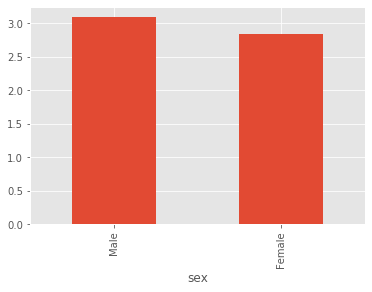

In [12]:
# Why do above? 
# Usually we want to find some obvious patterns 
# by looking at the data
tips_data['tip'].groupby(tips_data['sex']).mean().plot(kind='bar', rot=90)

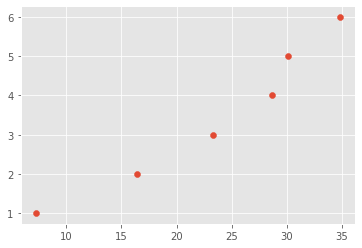

In [16]:
# aother example
# normally pandas does not allow scatter plot over Series
# This is an elegant way of a work-around
bill_vs_size = tips_data['total_bill'].groupby(tips_data['size']).mean()
plt.scatter(bill_vs_size, bill_vs_size.index)


# Your Turn Here

Can you observe any pattern from above figures?

# Your Turn Here

Similar to code block `[7]` above, can you create a figure of scatter plot between `tip` and `size`. Also, can you observe any pattern from the figure you just created?

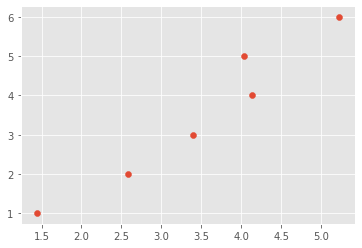

In [20]:
# your code here
tips.data

# Converting Data Types

- As any column in a `pandas` DataFrame, the data types determine what functions/methods are applicable
- `pandas` do not always recognize the correct data type automatically
- So it is important to know how to convert data between
    - how to convert `string` type to numeric values (__qualitative -> quantitative__)
    - how to convert _numeric_ values (e.g., `float`, `int`) to `string` objects (__quantitative -> qualitative__)
- Note that you do not have to do all type conversion at once

# Convert Numeric Values to String Objects

- There are several occasions that the features appear to be numeric but they do not have numeric semantics
    - e.g., a lot of datasets contain an `id` column (feature), which are usually numbers
    - but they do not have numeric semantics - e.g., calculating the _mean_ of the column has no meaning
    - in the latest `pandas` versions, any column contains `string` values are automatically recognized as `category`
    - but when we need them in machine learning, we need to convert them to `string` __objects__

In [9]:
# e.g., we can convert the column `sex` to `object`
# note we alway create a new column for the converted column
tips_data['sex_str'] = tips_data['sex'].astype(str)
tips_data.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

# Convert to Numeric Values

- As you saw above, `.astype()` is a generic method convert a column to another data type
- `.astype()` is a method for `pandas` Series - see documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html)
- you can use any Python built-in data types, or `Numpy` data types
    - here is a match between `Python` and `Numpy` data types (see [here](https://docs.scipy.org/doc/numpy/user/basics.types.html) for a complete list)

| Python | Numpy |
| ------ | ----- |
| `float` | `float64` |
| `int` | `int64` |
| `datetime` | `datetime64` |

In [10]:
# first convert `total_bill` to the `string` type
tips_data['total_bill'] = tips_data['total_bill'].astype(str)
tips_data.dtypes

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

In [11]:
# Now let's convert this column back
tips_data['total_bill'] = tips_data['total_bill'].astype(float) 
tips_data.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

# `to_numeric` function

- we can use a `pandas` specific function called `.to_numeric()`
- to convert any column to numeric values
- the benefit of using this function, over the `.astype()` method is that 
    - `to_numetic()` can handle errors

In [12]:
# subset the first ten rows in `tips_data`
tips_subset = tips_data.head(10)

# set some values to `'missing'`
tips_subset.loc[[1, 3, 5, 7], 'total_bill'] = 'missing'

tips_subset

/home/tao/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,total_bill,tip,sex,smoker,day,time,size,sex_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female
1,missing,1.66,Male,No,Sun,Dinner,3,Male
2,21.01,3.50,Male,No,Sun,Dinner,3,Male
3,missing,3.31,Male,No,Sun,Dinner,2,Male
4,24.59,3.61,Female,No,Sun,Dinner,4,Female
5,missing,4.71,Male,No,Sun,Dinner,4,Male
6,8.77,2.00,Male,No,Sun,Dinner,2,Male
7,missing,3.12,Male,No,Sun,Dinner,4,Male
8,15.04,1.96,Male,No,Sun,Dinner,2,Male
9,14.78,3.23,Male,No,Sun,Dinner,2,Male


In [13]:
# because of the `'missing'` values inserted
# the data type of the column is changed
tips_subset.dtypes

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

In [14]:
# this will create an error
tips_subset['total_bill'].astype(float)

ValueError: could not convert string to float: 'missing'

In [15]:
# this will create a similar error
pd.to_numeric(tips_subset['total_bill'])

ValueError: Unable to parse string "missing" at position 1

In [16]:
# but `to_numeric()` can handle errors using differet way
tips_subset['total_bill'] = pd.to_numeric(tips_subset['total_bill'], errors = 'ignore')
tips_subset.head(5)

/home/tao/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,total_bill,tip,sex,smoker,day,time,size,sex_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female
1,missing,1.66,Male,No,Sun,Dinner,3,Male
2,21.01,3.50,Male,No,Sun,Dinner,3,Male
3,missing,3.31,Male,No,Sun,Dinner,2,Male
4,24.59,3.61,Female,No,Sun,Dinner,4,Female


In [17]:
# note that the values causing errors are ignored
# we can also force the conversion
tips_subset['total_bill'] = pd.to_numeric(tips_subset['total_bill'], errors = 'coerce')
tips_subset.head(5)

/home/tao/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,total_bill,tip,sex,smoker,day,time,size,sex_str
0,16.99,1.01,Female,No,Sun,Dinner,2,Female
1,NaN,1.66,Male,No,Sun,Dinner,3,Male
2,21.01,3.50,Male,No,Sun,Dinner,3,Male
3,NaN,3.31,Male,No,Sun,Dinner,2,Male
4,24.59,3.61,Female,No,Sun,Dinner,4,Female


In [18]:
# look at how the data type is converted
tips_subset.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

# Categorical Data

- Not all data are numeric, `pandas` support categoical data natively [doc](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)
- Categorical data are particularly useful when:
    - if the `string` values are highly repeatable (e.g., `sex`), we should use categorical since it is memory and speed efficient
    - if the value of a column have some kind of order 
    - categorical data is optimized in some libraries

In [19]:
# convert `sex` to `object`
tips_data['sex'] = tips_data['sex'].astype(str)
tips_data.dtypes

total_bill     float64
tip            float64
sex             object
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

In [20]:
# convert it back to categorical
tips_data['sex'] = tips_data['sex'].astype('category')
tips_data.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object

# Why Categorical Data?

- categorical data are very popular in data analytics
- in BA545, we have a specific lecture on handling categorical data
- you can refer to [this link](https://www.geeksforgeeks.org/python-pandas-categorical/) or [this link](http://benalexkeen.com/mapping-categorical-data-in-pandas/) for more information regarding categorical data

# Discretization

- sometime you may want to convert numeric (_continuous_) data into discrete (_categorical_) data
    - the best example would be _histogram_ 
    - have you ever wondered how histogram works
- also, we often conduct discretization on continuous data
    - so that we can convert age into age groups, ...

In [21]:
# generate a Series of continuous values and call it ages
import random

age_series = pd.Series(random.sample(range(1, 101), 30), name='ages')
age_series.head()

0    49
1    16
2    82
3    85
4     4
Name: ages, dtype: int64

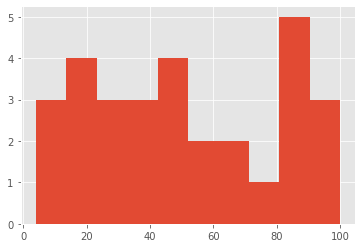

In [22]:
# create a histogram
# note how the continuous values are discretized?
age_series.hist()

In [23]:
# we can convert the data to follow this fashion
bucket = [1, 10, 20, 30,  40, 50, 60, 70, 80, 90, 100]

# the `.cit()` function can discretize this data for use
age_cut = pd.cut(age_series, bucket)
age_cut.head()

0    (40, 50]
1    (10, 20]
2    (80, 90]
3    (80, 90]
4     (1, 10]
Name: ages, dtype: category
Categories (10, interval[int64]): [(1, 10] < (10, 20] < (20, 30] < (30, 40] ... (60, 70] < (70, 80] < (80, 90] < (90, 100]]

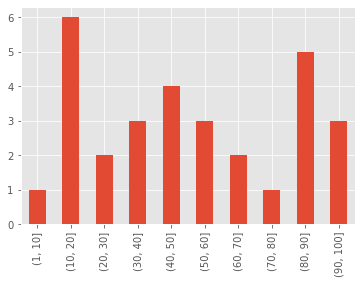

In [24]:
age_cut.value_counts().sort_index().plot(kind='bar')

# Logical Discretization

In [25]:
# we can even discretize the data by other logic
# e.g., under-age, adult, retired

new_bucket = [1, 21, 60, 100]
new_age_cut = pd.cut(age_series, new_bucket)
new_age_cut.head()

0     (21, 60]
1      (1, 21]
2    (60, 100]
3    (60, 100]
4      (1, 21]
Name: ages, dtype: category
Categories (3, interval[int64]): [(1, 21] < (21, 60] < (60, 100]]

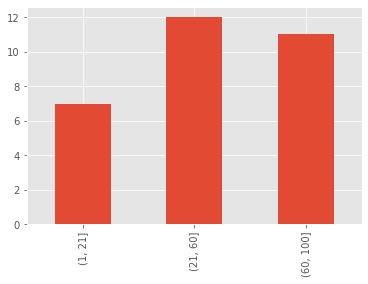

In [26]:
new_age_cut.value_counts().sort_index().plot(kind='bar')

![DSB logo](img/Dolan.jpg)
# Data Types

## PD4E Chapter 7: Data Types
### How do you read/manipulate/store data in Python?

![DSB logo](img/Dolan.jpg)
# String Data

## PD4E Chapter 8: String and Text Data
### How do you read/manipulate/store data in Python?

# Review Chapter 6 and 11 in PY4E

- We have covered strings and RegEx in the first half of the course
- please review them since this part is very similar

# Your Turn Here
Finish exercises below by following instructions of each of them.

## Q1. Coding Problem

Complete excecises regarding data types of the given DataFrame (`itinery_df`).

In [3]:
import random
import pandas as pd
# generating the DF
durations = pd.Series(random.sample(range(1, 30), 20), name='durations')
work_types = ['lecture', 'consulting', 'research']
work_type_series = pd.Series(random.choices(work_types, k=20), name='work_types')
locations = ['Beijing, China', 'London, England', 'Paris, France', 'Munich, Germany', 
             'Sydney, Australia', 'Mumbai, India', 'Madrid, Spain']
loc_series = pd.Series(random.choices(locations, k=20), name='locations')
hour_rates = pd.Series(random.sample(range(50, 100), 20), name='hour_rates')
hour_rates.loc[[2, 5, 7, 12, 16, 17]] = 'missing'
itinery_df = pd.concat([durations, work_type_series, loc_series, hour_rates], axis=1)
itinery_df['durations'] = itinery_df['durations'].astype(str)
itinery_df.head()

,durations,work_types,locations,hour_rates
0,2,consulting,"Munich, Germany",83
1,12,consulting,"Paris, France",84
2,6,lecture,"Beijing, China",missing
3,17,research,"Beijing, China",60
4,1,consulting,"Munich, Germany",63


## Part 1:

Find the data types for the columns in `itinery_df`.

In [4]:
itinery_df.dtypes

durations     object
work_types    object
locations     object
hour_rates    object
dtype: object

## Part 2:

Calculate the total payment for each row, $ payment_{total} = duration \times hour\_rate $.

In order to do that, you need to:
1. convert the `durations` and `hour_rates` to numerical (integer) type.
2. handle all `'missing'` values in the `hour_rates` column - use the average of the column to replace missing values.
3. create a new column namely `payments`, then put the calculation results in it.

In [5]:
#convert duration into integer
import pandas as pd
itinery_df['durations'] = itinery_df['durations'].astype(int)
itinery_df.dtypes


durations      int64
work_types    object
locations     object
hour_rates    object
dtype: object

In [6]:
itinery_df['hour_rates'] = pd.to_numeric(itinery_df['hour_rates'],errors='coerce')
itinery_df.dtypes

durations       int64
work_types     object
locations      object
hour_rates    float64
dtype: object

In [7]:
#handle all 'missing' values in the hour_rates column - use the average of the column to replace missing values
itinery_df['hour_rates'] = itinery_df['hour_rates'].fillna(itinery_df['hour_rates'].mean())
itinery_df

,durations,work_types,locations,hour_rates
0,2,consulting,"Munich, Germany",83.000000
1,12,consulting,"Paris, France",84.000000
2,6,lecture,"Beijing, China",74.071429
3,17,research,"Beijing, China",60.000000
4,1,consulting,"Munich, Germany",63.000000
5,20,research,"Paris, France",74.071429
6,26,consulting,"London, England",80.000000
7,19,consulting,"Madrid, Spain",74.071429
8,18,lecture,"London, England",71.000000
9,7,research,"Sydney, Australia",81.000000


In [8]:
itinery_df['hour_rates'] = itinery_df['hour_rates'].fillna(itinery_df['hour_rates'].mean()).astype(int)
itinery_df.dtypes

durations      int64
work_types    object
locations     object
hour_rates     int64
dtype: object

In [9]:
#create a new column namely payments, then put the calculation results in it
itinery_df['payments']=itinery_df['durations']*itinery_df['hour_rates']
itinery_df

,durations,work_types,locations,hour_rates,payments
0,2,consulting,"Munich, Germany",83,166
1,12,consulting,"Paris, France",84,1008
2,6,lecture,"Beijing, China",74,444
3,17,research,"Beijing, China",60,1020
4,1,consulting,"Munich, Germany",63,63
5,20,research,"Paris, France",74,1480
6,26,consulting,"London, England",80,2080
7,19,consulting,"Madrid, Spain",74,1406
8,18,lecture,"London, England",71,1278
9,7,research,"Sydney, Australia",81,567


## Part 3:

Visualize average `hour_rates` by `work_types`.

__HINT__: Refer to [here](#Why-to-differentiate?) if you feel you need a little help.

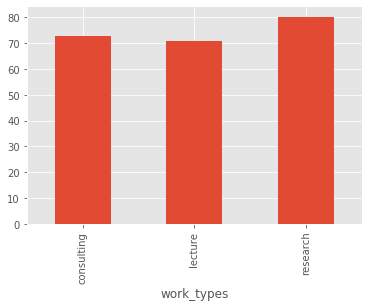

In [10]:
#Visualize average hour_rates by work_types.
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

itinery_df['hour_rates'].groupby(itinery_df['work_types']).mean().plot(kind='bar',rot=90)

## Part 4:

Create two new columns `cities` and `countries`.

- `cities` refer to the first part in `locations` - before the `,`
- `countries` refer to the second part in `locations`
- note that there is a space after `,` that you need to remove

In [11]:
itinery_df[['cities','countries']] = itinery_df['locations'].str.split(',',expand=True) 
itinery_df.head()


,durations,work_types,locations,hour_rates,payments,cities,countries
0,2,consulting,"Munich, Germany",83,166,Munich,Germany
1,12,consulting,"Paris, France",84,1008,Paris,France
2,6,lecture,"Beijing, China",74,444,Beijing,China
3,17,research,"Beijing, China",60,1020,Beijing,China
4,1,consulting,"Munich, Germany",63,63,Munich,Germany


## Part 5:

Visualize the `payments` column, using the rules below:

| Type | Payment |
| ------- | ----- |
| Very Low | 0 - 100 |
| Low | 101 - 200 |
| Medium | 201 - 300 |
| High | 300 + |

Your visualization should look very similar to [this](#Logical-Discretization).

Report which type is the most popular.

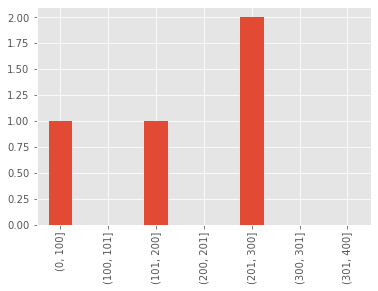

In [12]:
payments_bucket = [0, 100, 101,200, 201, 300, 301,400]
new_payments_col = pd.cut(itinery_df['payments'], payments_bucket)
new_payments_col.head()
new_payments_col.value_counts().sort_index().plot(kind='bar')




# Classwork (start here in class)
You can start working on them right now:
- Read Chapters 7 & 8 in PD4E 
- If time permits, start in on your homework. 
- Ask questions when you need help. Use this time to get help from the professor!

# Homework (do at home)
The following is due before class next week:
  - Any remaining classwork from tonight
  - DataCamp “Case Study - Summer Olympics” assignment
  - Coding assignment part 3

Note: All work on DataCamp is logged. Don't try to fake it!

Please email [me](mailto:jtao@fairfield.edu) if you have any problems or questions.

![DSB logo](img/Dolan.jpg)
# String Data

## PD4E Chapter 8: String and Text Data
### How do you read/manipulate/store data in Python?